Importing Neccessary Libraries

In [1]:
from google.colab import drive

import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

random.seed(42)

In [2]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Function to Change Dimension

In [3]:
def changeDim(x1, x2):
  return np.transpose(np.array([(x1**(i-j)*x2**(j)) for i in range(1,7) for j in range(0,i+1)]))

Find Decision Region:

In [4]:
def findDecisionRegion(testOneData, testTwoData, descCoeff, descBias):
  dimOne, dimTwo = testOneData.shape
  decisionRegion = np.array([descCoeff * changeDim(testOneData[i][j], testTwoData[i][j]) for i in range(dimOne) for j in range(dimTwo)])
  return (decisionRegion.sum(axis=1) + descBias).reshape(testOneData.shape)


Main

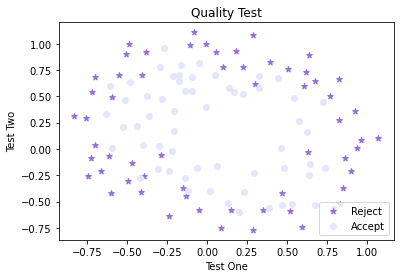

The accuracy of this classification is: 83.0508 %


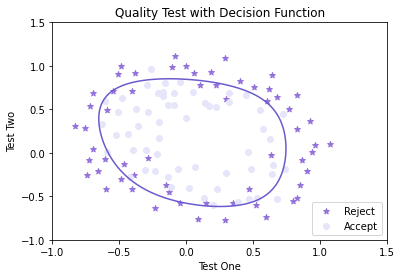

In [5]:
#Read Data:
data = pd.read_csv(r'/content/gdrive/My Drive/Colab Notebooks/HW/2/quality_test.csv', header=None).sample(frac=1)

#Plot DataSet:
data = data.values
zerosData = np.array([data[i,0:2] for i in range(len(data)) if data[i,2]==0])
onesData = np.array([data[i,0:2] for i in range(len(data)) if data[i,2]==1])


plt.scatter(zerosData[:,0], zerosData[:,1],
                marker='*', color='mediumpurple', label='Reject')
plt.scatter(onesData[:,0], onesData[:,1],
                marker='o', color='lavender', label='Accept')

plt.title('Quality Test')
plt.xlabel('Test One')
plt.ylabel('Test Two')
plt.legend(loc="lower right")
plt.show()

#Separating Features and Labels:
X1 = data[:,0]
X2 = data[:,1]

y = data[:,2]

#Change Dimention:
X = changeDim(X1, X2)

#Employing Logistic Regression:
myClsf = LogisticRegression()
myClsf.fit(X, y)

#Calculating Accuracy
predLabel = myClsf.predict(X)
print('The accuracy of this classification is: %1.4f %%' %((predLabel==y).mean()*100))


#Find the Desicion Region:

#Parameters of Decision Function:
descCoeff = np.transpose(myClsf.coef_).ravel()
descBias = myClsf.intercept_

X = data[:,0:2]
testOneDataMin, testOneDataMax, testTwoDataMin, testTwoDataMax = X[:, 0].min()-1, X[:, 0].max()+1, X[:, 1].min()-1, X[:, 1].max()+1


#Changing the Dimention of Data:
arangeStep = 0.01
testOneData, testTwoData = np.meshgrid(np.arange(testOneDataMin, testOneDataMax, arangeStep),np.arange(testTwoDataMin, testTwoDataMax, arangeStep))

decisionRegion = findDecisionRegion(testOneData, testTwoData, descCoeff, descBias)

#Plotting the Results:
plt.scatter(zerosData[:,0], zerosData[:,1],
                marker='*', color='mediumpurple', label='Reject')
plt.scatter(onesData[:,0], onesData[:,1],
                marker='o', color='lavender', label='Accept')

plt.contour(testOneData, testTwoData, decisionRegion, levels=[0], colors='slateblue')
plt.xlim((-1,1.5))
plt.ylim((-1,1.5))
plt.title('Quality Test with Decision Function')
plt.xlabel('Test One')
plt.ylabel('Test Two')
plt.legend(loc="lower right")
plt.show()